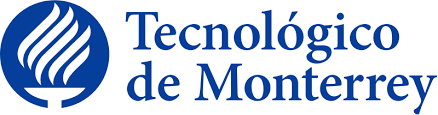

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Asesor: Luis Eduardo Falcón Morales
## **Avance 1. Análisis exploratorio de datos**
###**Equipo 18:**
###**A01793052 - Juan Carlos Lopez Cruz**


## **Website description**:

ConsumerAffairs is a rapidly growing online marketplace where each month millions of consumers research purchases, connect with brands, transact, write reviews and stay up to date on important consumer news.

Brands utilize our software-as-a-service platform to connect with customers, collect reviews and generate sales.

ConsumerAffairs has a creative, driven and fast-paced entrepreneurial environment. We are looking for teammates that want to win, are self-motivated, high performing and who yearn to build something big.

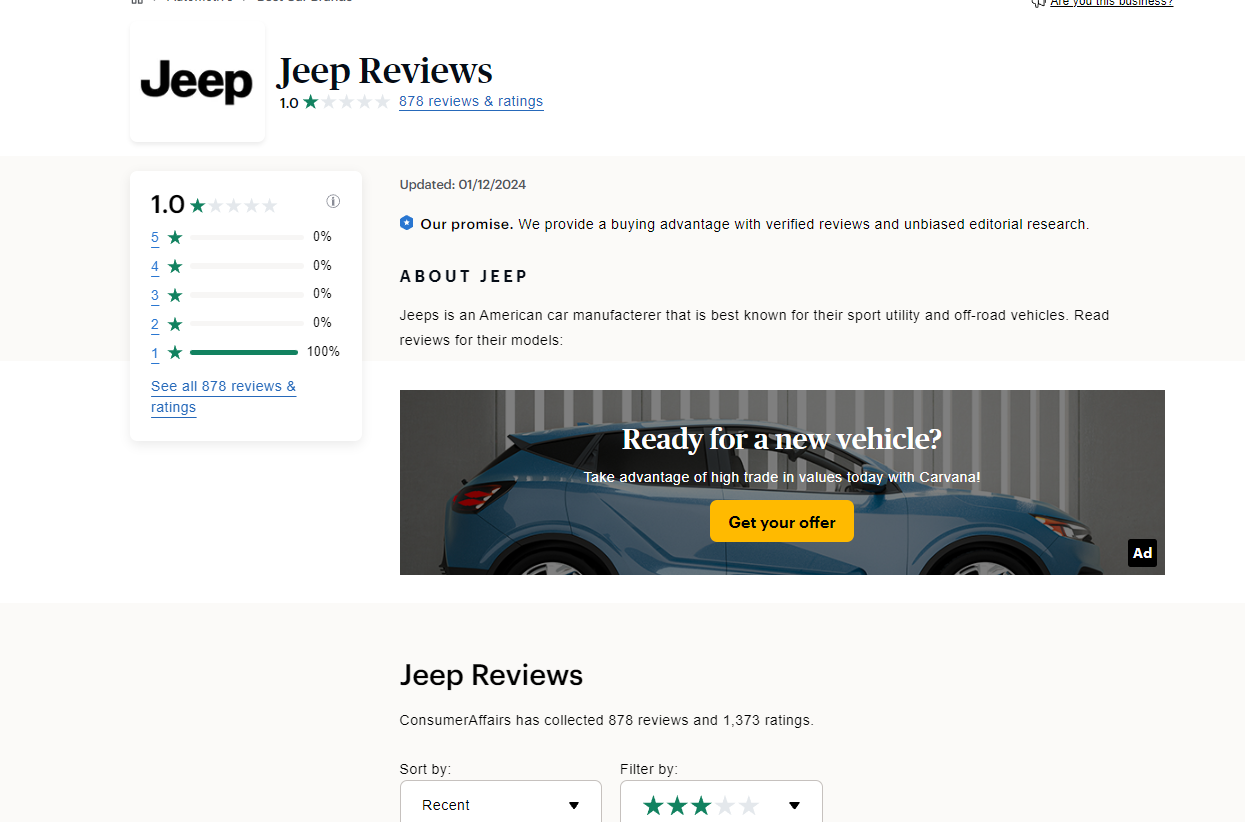

## **Libraries to install**

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00


## **Libraries to be used**

In [72]:
import requests
from bs4 import BeautifulSoup as soup
from random import randint
from time import sleep
from datasets import Dataset, load_dataset, DatasetDict
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
url = 'https://www.consumeraffairs.com/automotive/jeep.htm?page=2#scroll_to_reviews=true'
#url = 'https://www.consumeraffairs.com/automotive/jeep.htm#scroll_to_reviews=true'
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})
print(html.status_code) # the outoput  "200" only  is the status if there is a response correct.

200


# **Web Scrapping part**

Web scraping refers to the extraction of data from a website. This information is collected and then exported into a format that is more useful for the user. Be it a spreadsheet or an API.


## **1-First let's collect all the links of the opinions:**

The website only shows 7 pages with comments realted to Jeep brand

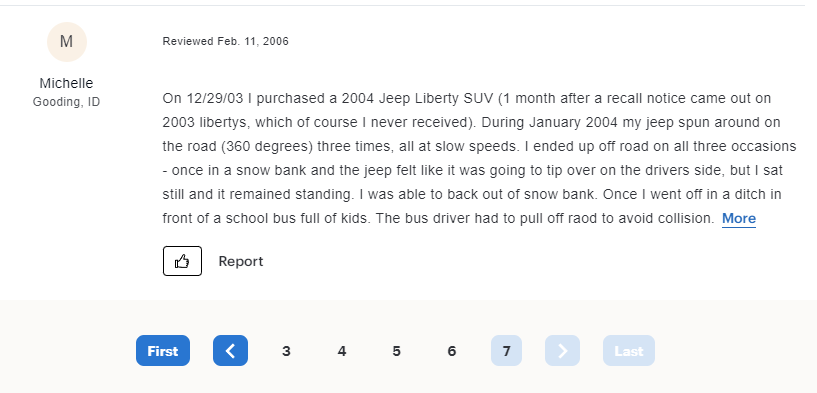

In [5]:
links = []

max_or_num = 8  # This is the value maximum that link shows of pages


reviews_x_pages = 1    # The pages are changing 1 by 1.

for k in range(1, max_or_num, reviews_x_pages):
  a = url
  if k == 1:
    a=a.replace("page=2","")     # for the first page there is not page number
  else:
    ss = str(k)  # convertimos a string el valor numérico.
    a=a.replace("2",ss)
  links.append(a)


links

['https://www.consumeraffairs.com/automotive/jeep.htm?#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=2#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=3#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=4#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=5#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=6#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=7#scroll_to_reviews=true']

## **2- The next step is to extract the comments of the reviewd from each page.**

**Considerations:**


1- Some comments do not have rating  but these start from page 5.

2- Some comments do not show complet if the user does not clik on More button.


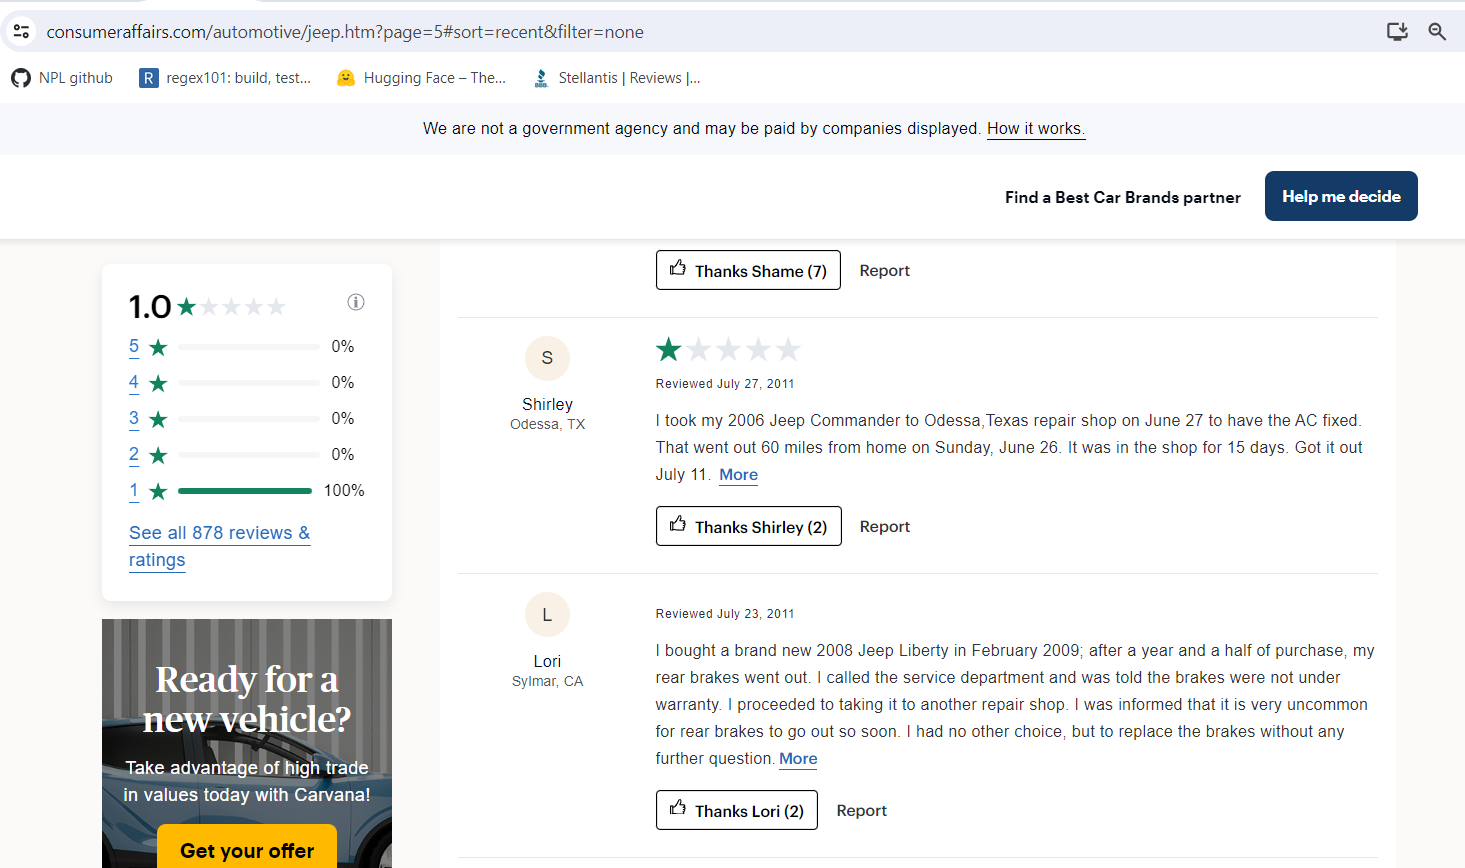

In [6]:
# The following Code is to extract the comments from https://www.consumeraffairs.com/automotive/jeep.htm

reviews = [] # This list will include the comments from web scrapping in the first run
review_text= [] # This list that we will use to storage the final comments
stars =[] # This list will storage the raiting.


numpages = int( max_or_num / reviews_x_pages )  # The number of pages is 7 but for start in 0 to 8

for link in links[0:numpages]:
  print(link)
# This code check the status of the status if there is a response correct.
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36' }
  html2 = requests.get(link, headers=headers)
  #print(html2.status_code) ####

  sleep(randint(1,5))   # sleep intervals are included so that calls are not continuously made to the page
                         # and that by detecting this continuous activity, it can be detected as suspicious activity by the server
                         # and can automatically block us for it.
  bsobj1 = soup(html2.content,'lxml')   # BeautifulSoup library object to carry out our task.

  # We extract comments in either of the following two ways:
  # We include some Print just to visualize how the process is carried out:

  # The following code is to extract the text of the comments thad button More shows once the user press click
  reviews2 = [] # This list will storage per page the text of comments that button "More" shows
  for review2 in bsobj1.findAll('div', {'class' : 'js-collapsed rvw__all-text'}): # class that return the text of More button
     # print(review2.text)
      reviews2.append(review2.text.strip())
#####################

  sleep(randint(1,5))
  bsobj2 = soup(html2.content,'lxml')

  i=0 # This variable is to pass the remaining text from buttom More to the comments.
  for review in bsobj2.findAll('div', {'class' : 'rvw__top-text'}): #class tha provide the text form the pages
      if "      More" in review.text: # If the comment has the button More
        review_text =review.text.replace("                                  More", reviews2[i]) #The remaing text replace the More word in the comment
        i=i+1 # This will increase until the final remaining text per comment.
      else: # if the comments does not have the button More just extract the text.
        review_text=review.text
      print(review_text)
      reviews.append(review_text.strip()) #Storage all in the list reviews

  sleep(randint(1,5))
  bsobj3 = soup(html2.content,'lxml')

   # Let's also extract the ratings (stars):
   # In particular in this case we will extract the entire string where the
   # rating of the hotel by the user and from there through regex you can
   # Easily perform rating extraction:
  for cal in bsobj3.findAll('div', {'class' : 'rvw__hdr-stat'}):
    cal= cal.find("div")["class"][2]
    cal=int(cal[-1])
    print(cal)
    #  Aquí puedes incluir tu regex para extraer solo la calificación numérica.
    stars.append(cal)

https://www.consumeraffairs.com/automotive/jeep.htm?#scroll_to_reviews=true
I was so excited to buy a Jeep but turns out it is the worst decision I have ever made. Between Jeep, Jeep Customer Care, and Preston's (Dealership & Service) the experience has been nothing but a frustrating headache! Bought a brand-new Jeep and it is still under warranty, all work and upkeep has been done by the jeep certified dealership, had been taking it back to the dealership for months on months telling them there is something wrong with it, motor was ticking, was bogging down, and screen going haywire. After 8-9 months of back and forth and many appointments and tests they say my motor is blown, it is burning through oil, a new vehicle with 26,000 miles on it. Jeep and the dealership have no answers just excuses. Customer Care is ridiculous, it has been over 2 months and no fix or response, and just a blame game between Jeep and the dealership and excuses.
The 2015 Jeep Wrangler Willy I purchased is a p

In [8]:
print('Qty of comments:', len(reviews))
print('Qty of rates:', len(stars))

Cantidad de comentarios extraídos: 878
Cantidad de claificaciones: 509


** 878 comments were found as the website says.**

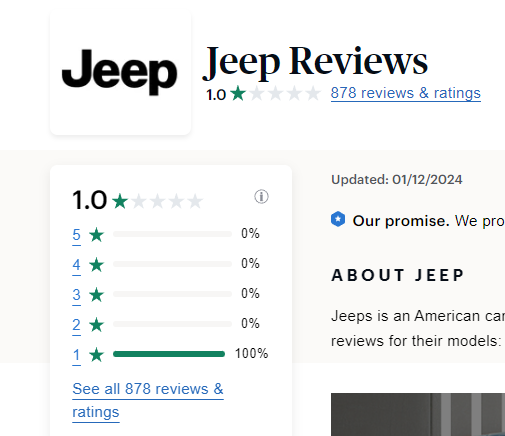

**Note:** In Page 5 there was a comment rated it is recommended to eliminate to make easy the analysis so we will have 508 stars.


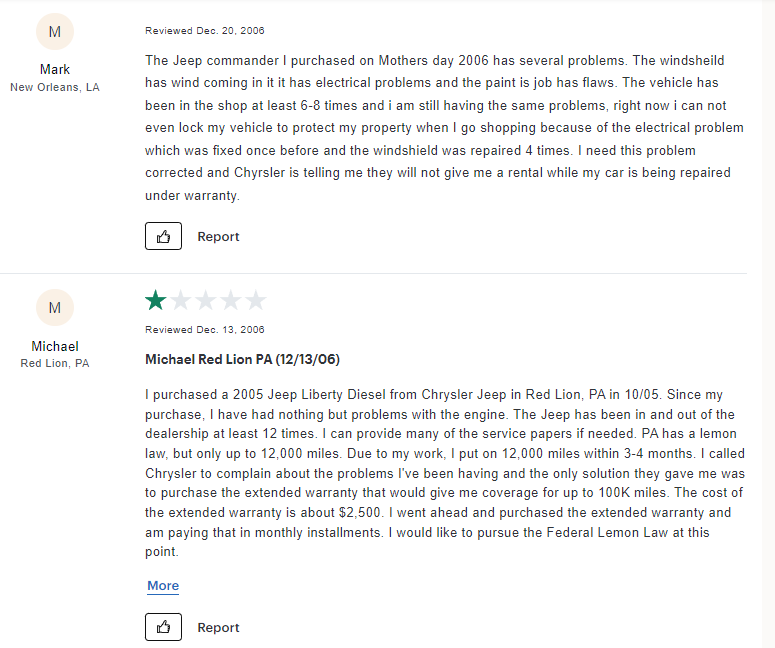

## **3- Validation that comments and rates are according to the website.**

As it was mentioned in the begining of step 2: There are some comments that dont have raiting since page 5.

**Note:** We will use the comments rated and we will use the comments w/o raiting to later use to evaluate the sentiment analizer.

In [39]:
stars=stars[0:508]

In [50]:
reviews_rated = reviews[0:508]
reviews_norated= reviews[508:-1]

In [46]:
reviews_rated[507]

'I took my 2006 Jeep Commander to Odessa,Texas repair shop on June 27 to have the AC fixed.  That went out 60 miles from home on Sunday, June 26. It was in the shop for 15 days. Got it out July 11. \n      I was told two-three days and it would be ready. Fifteen days later, it was ready. No parts had to be ordered for the AC.  One part was ordered for the temp ready inside of jeep on Thursday and received on Monday morning and then it was ready that afternoon.This will be the last time we will buy any brand that you sell.  I had doctor appointments and a lot of errands to do.  It was very hard for family and friends to stop and take time to help me out.  I am very unhappy about this problem and something needs to be done about it.'

In [52]:
stars[507]

1

In [51]:
reviews_norated[0]

'I bought a brand new 2008 Jeep Liberty in February 2009; after a year and a half of purchase, my rear brakes went out. I called the service department and was told the brakes were not under warranty. I proceeded to taking it to another repair shop. I was informed that it is very uncommon for rear brakes to go out so soon. I had no other choice, but to replace the brakes without any further question.\n      Now after just three-four months later, I began having more issues with the vehicle; smoking in the rear end, oil leaking and the smell of something burning and then the rattling in the rear, which ended with the rear brakes completely locking up on me--leaving me stranded at night, with my six year old son and my 18 month old daughter. I had to have the car towed to the dealership the following day. They had the vehicle for two days, stating it was the rear-end differential that went out. I was at that time asking for a rental car, which the dealership said they did not do. So, I w

**Lets check the last comment rated in the page #5.**

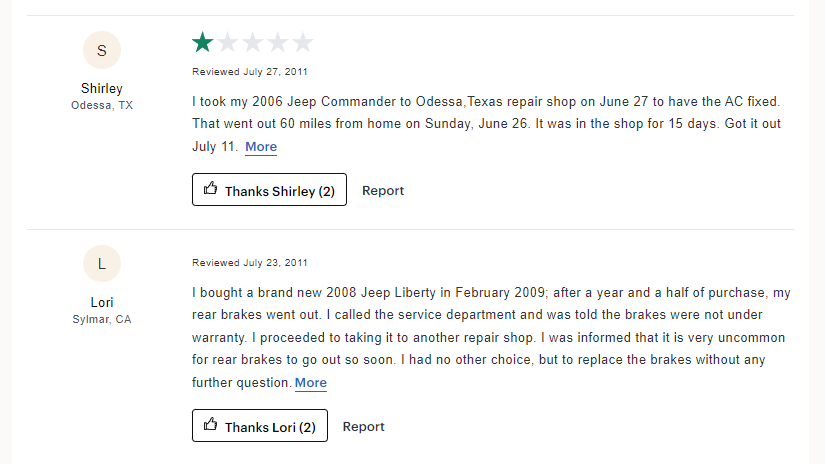

## **4- Creation of binary label, dataframe and Storage in cvs file .**

Convert the rates scale (1,2,3,4,5) to binary problem.

In [54]:
ds = Dataset.from_dict({"text": reviews_rated, "labels": [1 if star >= 3 else 0 for star in stars]})
ds

Dataset({
    features: ['text', 'labels'],
    num_rows: 508
})

**Justification:**

When it comes to converting scores from a multi-class classification problem to a binary problem, there are different approaches that can be taken. A common way to approach this situation is to set a threshold to divide ratings into positive and negative.

In this case, if you want to consider ratings between 3 and 4 as 3.5, it is possible to set a threshold at 3.5 to classify the ratings as positive or negative. Any rating equal to or greater than 3.5 would be considered positive, while any rating below 3.5 would be considered negative.

This choice is based on the assumption that a rating of 3.5 is somewhere between positive ratings (greater than 3.5) and negative ratings (less than 3.5). By considering the rating of 3.5 as positive, it is being assumed that comments with a rating close to 3.5 still contain positive elements and should therefore be treated as such.

However, it is important to note that the choice of threshold may depend on the specific context and requirements of the problem. In some cases, it may be more appropriate to adjust the threshold to classify ratings between 3 and 4 as positive or negative. This will depend on the distribution of ratings and how the concept of "positive" and "negative" is defined in the context of the problem at hand. In our case we decided to consider ratings greater than or equal to 4 as positive and those less than 4 as negative.

In [57]:
ds.to_pandas().to_csv('./Jeep_comments_rated.csv', index = False, encoding = 'utf8')

In [68]:
from google.colab import files
files.download('Jeep_comments_rated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# Calculate the ratio of positive and negative tags
label_count = ds.to_pandas().labels.value_counts()
proportion_negative, proportion_positive = (label_count/len(ds['labels'])).tolist()
# Print the ratio of positive and negative labels
print(f"% of positive comments: {proportion_positive:.2f}")
print(f"% of negative comments: {proportion_negative:.2f}")

% of positive comments: 0.15
% of negative comments: 0.85


In [75]:
label_count

0    432
1     76
Name: labels, dtype: int64

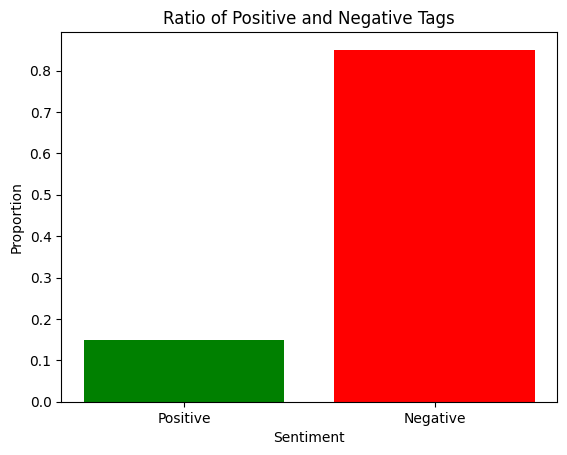

In [73]:
# Plot the proportions
labels = ['Positive', 'Negative']
proportions = [proportion_positive, proportion_negative]

plt.bar(labels, proportions, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.title('Ratio of Positive and Negative Tags')
plt.show()

# **Questions to solve?**

- Are there missing values in the data set? Can patterns of absence be identified?
> **When the data was extracted with web scraping, it was identified that some did not have a rate, it was decided to leave these aside and only use those that have a rate for the analysis.**

- What are the summary statistics of the data set?
> **The data is text and there is not too much statics that you can do only check the frequency of classes positive and negative.**
- Are there outliers in the data set?
> **The data is text no outliers are observed**
- What is the cardinality of categorical variables?
>**Data is text lables are 0 and 1.**
- Are there skewed distributions in the data set? Do we need to apply any non-linear transformation?
- Are temporal trends identified?
> **Data is text.**
- Is there a correlation between the dependent and independent variables?
> **Data is Text and the sentimiment should be the correlation.**
- How is the data distributed based on different categories?
> **Data is text.**
- Are there patterns or groupings (clusters) in the data with similar characteristics?
> **Data is Text.**
- Should the images be normalized to view them better?
> **Data is text and it is a binary problem.**
- Is there an imbalance in the classes of the target variable?
> **Yes we must create more positive comments to balance the classes.**

# **Conclusions:**

It is observed that the classes are unbalanced and it will be necessary to create synthetic data to balance the classes.

76 positive classes
432 negative classes

In this case we will review the following options:
1- As in this case our data is Text, one option is to use a text generating model to generate synthetic comments with positive classes so that we have enough positive classes to perform the sentiment analysis.

2- The amount of negative data could be reduced but this is not advisable since we would lose data and for sentiment analysis the model may not be as robust.

The solution will be discussed with the advisor to have better feedback regarding this point of the project and look for the best option of these two or consider another one.

# **References:**
- ParseHub. (n.d.). What Is Web Scraping? | ParseHub. ParseHub. Retrieved January 28, 2024, from https://www.parsehub.com/blog/what-is-web-scraping/

- Falcón Morales, L. E. (2023). Maestría en Inteligencia Artificial Aplicada. ITESM

- Kumar Mukhiya, S., y Ahmed, U. (2020). Hands-On Exploratory Data Analysis with Python. Packt Publishing.